# Explore here

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from pickle import dump

In [262]:

url = "https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv"
pd.read_csv(url).to_csv('../data/diabetes.csv', index=False)


In [263]:
df = pd.read_csv("../data/diabetes.csv")

In [264]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [265]:
df.shape

(768, 9)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [267]:
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(num_duplicados)

0


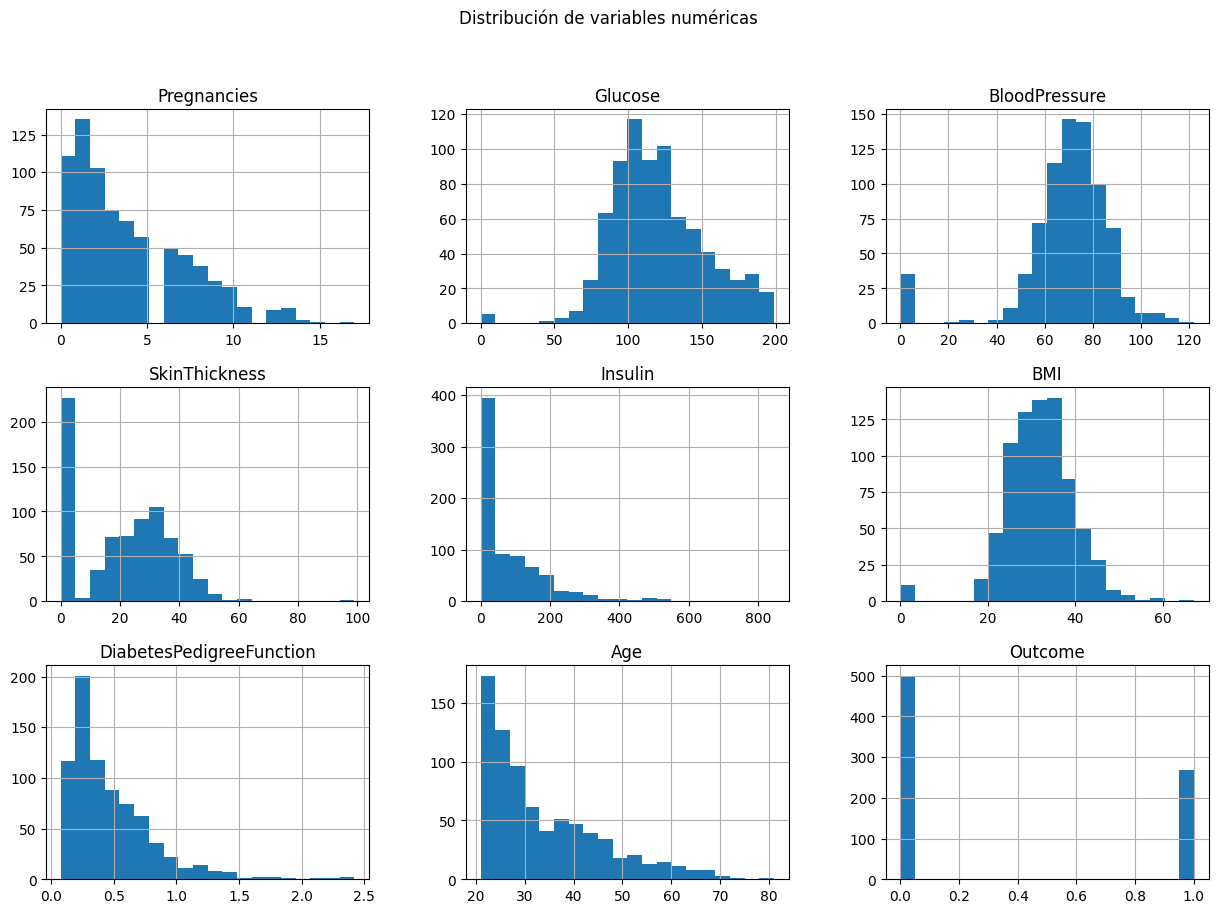

In [268]:
# Aislar variantes numericas y ver distribucion
num_cols = df.select_dtypes(include='number').columns
df[num_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribución de variables numéricas')
plt.show()

In [269]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [270]:
df['Glucose'].sort_values(ascending=True)

75       0
182      0
502      0
342      0
349      0
      ... 
408    197
579    197
228    197
561    198
661    199
Name: Glucose, Length: 768, dtype: int64

In [271]:
df['BMI'].sort_values(ascending=True)

81      0.0
371     0.0
426     0.0
145     0.0
522     0.0
       ... 
120    53.2
125    55.0
673    57.3
445    59.4
177    67.1
Name: BMI, Length: 768, dtype: float64

In [272]:
df['BloodPressure'].sort_values(ascending=True)

15       0
49       0
706      0
60       0
357      0
      ... 
549    110
43     110
177    110
691    114
106    122
Name: BloodPressure, Length: 768, dtype: int64

In [273]:
df = df[(df['Glucose'] != 0) & (df['BMI'] != 0)]


In [274]:
# Número de filas antes y después
print("Después:", len(df))


Después: 752


In [275]:

print("Antes:", len(df))
print("Outliers:", (df['Pregnancies'] > 10).sum())


Antes: 752
Outliers: 34


In [276]:

Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Eliminar outliers
df = df[(df['BloodPressure'] >= lower_bound) & (df['BloodPressure'] <= upper_bound)]


In [277]:
df.shape

(710, 9)

In [278]:
zeros_cols = ['SkinThickness', 'Insulin']

for col in zeros_cols:
    # Calcular medianas por grupo de Outcome
    median_0 = df[df['Outcome'] == 0][col].median()
    median_1 = df[df['Outcome'] == 1][col].median()
    
    # Reemplazar ceros según el grupo
    df.loc[(df['Outcome'] == 0) & (df[col] == 0), col] = median_0
    df.loc[(df['Outcome'] == 1) & (df[col] == 0), col] = median_1


In [279]:
df.shape

(710, 9)

### Limpieza
Eliminamos outliers con valor 0 de variables como Glucosa y BMI, eliminamos tambien outliers de bloodpresure que estan fuera de los interquantiles.

A la vez se decidio iterar

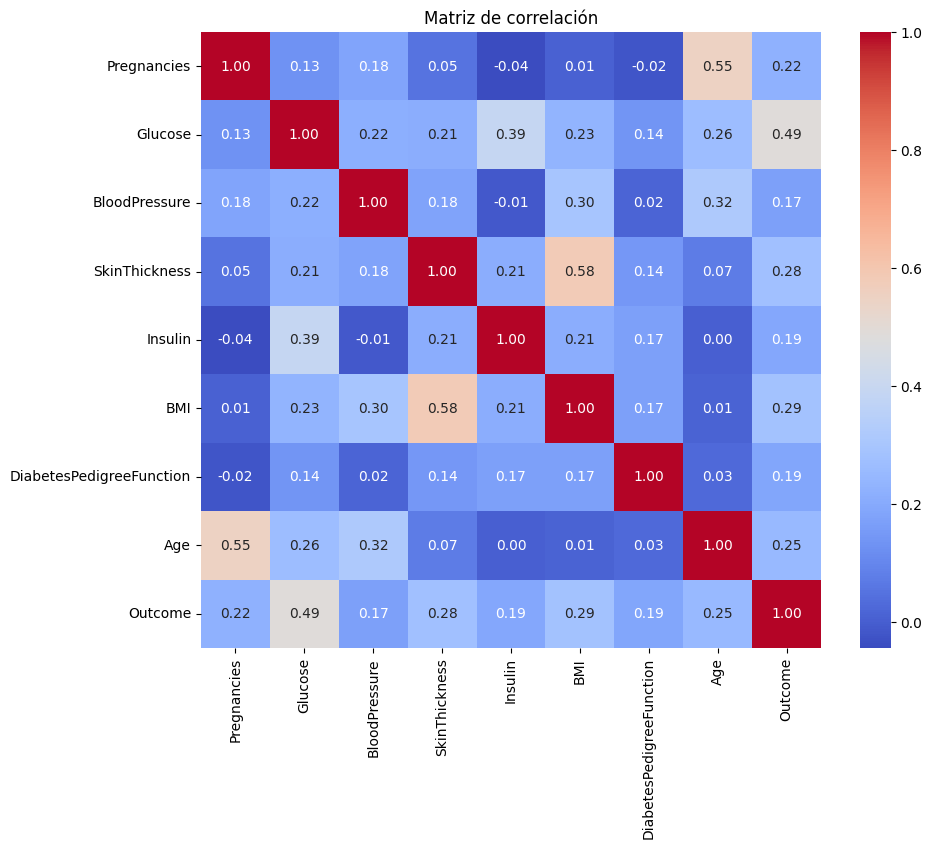

In [280]:
corr = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

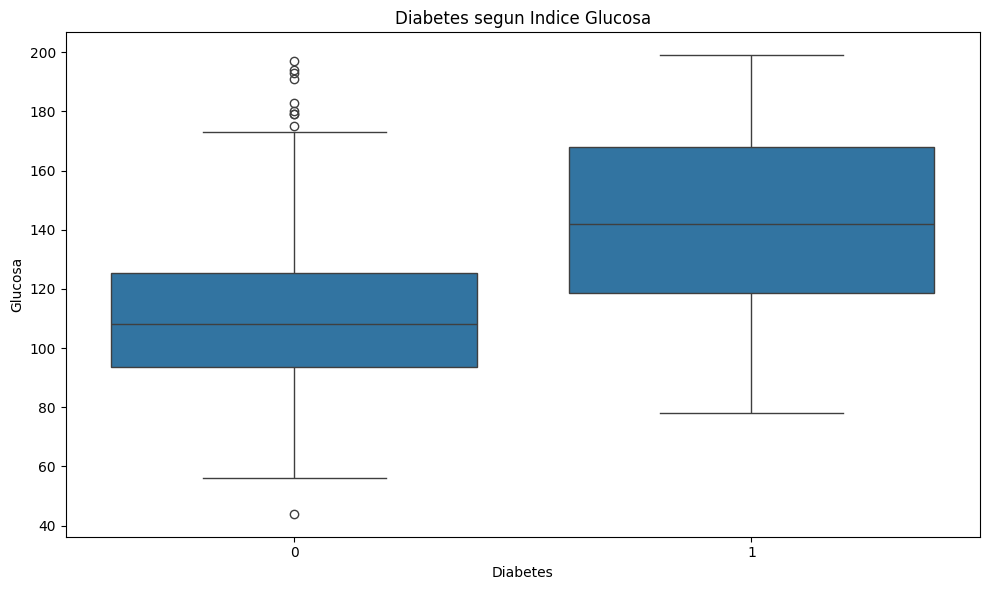

In [281]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Outcome', y='Glucose')
plt.title('Diabetes segun Indice Glucosa')
plt.xlabel("Diabetes")
plt.ylabel("Glucosa")
plt.tight_layout()
plt.show()

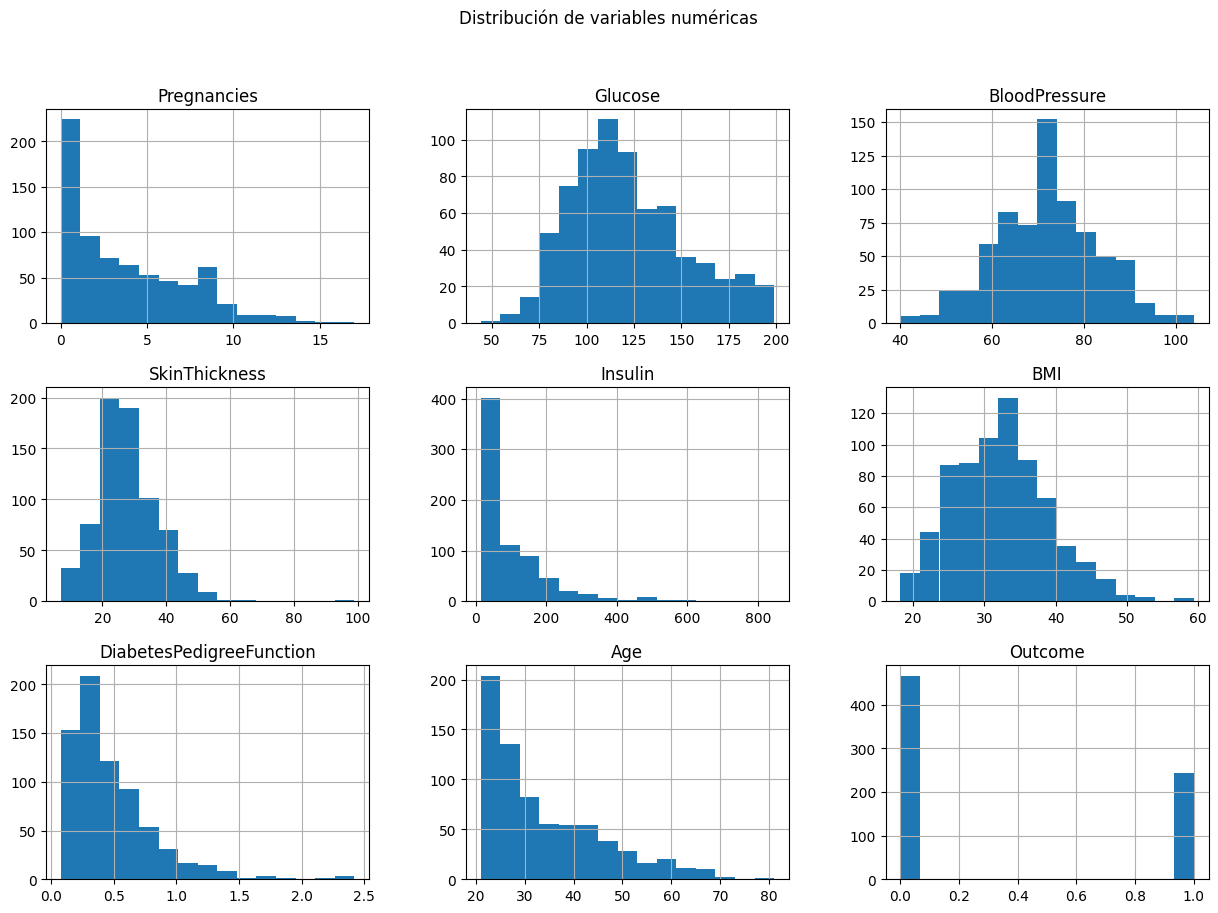

In [282]:
# Aislar variantes numericas y ver distribucion
num_cols = df.select_dtypes(include='number').columns
df[num_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribución de variables numéricas')
plt.show()

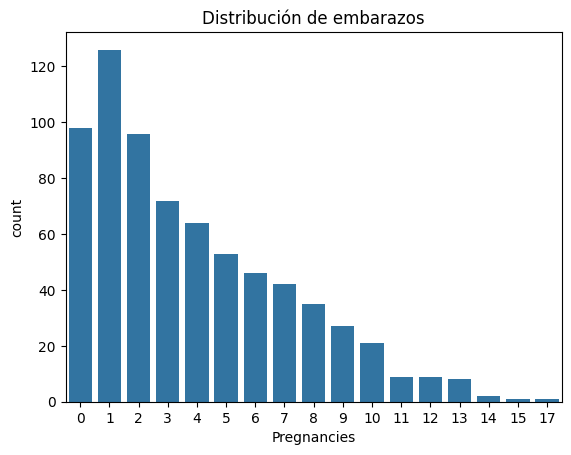

In [283]:

sns.countplot(x='Pregnancies', data=df)
plt.title('Distribución de embarazos')
plt.show()


In [284]:
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,95,60,18,58,23.9,0.260,22
633,1,128,82,17,183,27.5,0.115,22
28,13,145,82,19,110,22.2,0.245,57
173,1,79,60,42,48,43.5,0.678,23
594,6,123,72,45,230,33.6,0.733,34


In [ ]:
# Guardar como CSV
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Alternativa más rápida y compacta: guardar todo en un archivo pickle


with open('dataset.pkl', 'wb') as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)

In [285]:
num_variables = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [286]:

scaler = StandardScaler()

# entreno el escalador con los datos de entrenamiento
scaler.fit(X_train[num_variables])

# aplico el escalador en amhos
X_train_num_scal = scaler.transform(X_train[num_variables])
X_train_num_scal = pd.DataFrame(X_train_num_scal, index = X_train.index, columns = num_variables)

X_test_num_scal = scaler.transform(X_test[num_variables])
X_test_num_scal = pd.DataFrame(X_test_num_scal, index = X_test.index, columns = num_variables)

X_train_num_scal.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,-0.829305,-0.905281,-1.087755,-1.040967,-0.506146,-1.282494,-0.654169,-0.948870
633,-0.829305,0.179182,0.854875,-1.145746,0.775419,-0.737718,-1.083795,-0.948870
28,2.889473,0.737844,0.854875,-0.936188,0.026985,-1.539749,-0.698613,2.073163
173,-0.829305,-1.431082,-1.087755,1.473735,-0.608671,1.683509,0.584341,-0.862526
594,0.720186,0.014869,-0.028138,1.788073,1.257288,0.185375,0.747303,0.087256


In [ ]:
# Guardar como CSV
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Alternativa más rápida y compacta: guardar todo en un archivo pickle
import pickle

with open('dataset.pkl', 'wb') as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)

In [287]:
tree = DecisionTreeClassifier()


tree.fit(X_train_num_scal, y_train)


y_pred = tree.predict(X_test_num_scal)

In [288]:
# modelo
model = DecisionTreeClassifier(random_state = 16, max_depth = 12)

# entrenamiento
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,12
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,16
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [289]:
# predicción
y_pred_test = model.predict(X_test)
y_pred_test

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0])

In [290]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [291]:
# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)


Accuracy Test:  0.8380281690140845
F1 score Test:  0.8380281690140845
Precision Test:  0.8380281690140845
Recall Test:  0.8380281690140845
Accuracy Train:  0.9964788732394366
F1 score Train:  0.9964788732394366
Precision Train:  0.9964788732394366
Recall Train:  0.9964788732394366


In [292]:
print(classification_report(y_test, y_pred_test,))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        97
           1       0.78      0.69      0.73        45

    accuracy                           0.84       142
   macro avg       0.82      0.80      0.81       142
weighted avg       0.83      0.84      0.84       142



In [293]:
dump(model, open("decision_tree_classifier_default_42.sav", "wb"))